# Aligning RGB images with astroalign
I use this image as example
https://www.eso.org/public/archives/images/large/eso1547a.jpg

I cut out a smaller region (orig.jpg), because the full image is too large to run the program easily.

In fact, this example also shows the limitations of ASTROALIGN when dealing wiht large images or when the images are too different (see in-line comments).


In [6]:
# Import module from pillow image library
#https://pillow.readthedocs.io/en/stable/index.html
from PIL import Image
import astroalign as aa
import matplotlib.pyplot as plt
%matplotlib inline


Import source and target image.
The source is to be matched to the target.

In [7]:
source = Image.open("detail.jpg")
target = Image.open("orig.jpg")
source = source.rotate(120.0)
f = 1.3 # Try different resizing factors. Eventually, it will not work.
newsize = (round(f*source.size[0]),round(f*source.size[1]))
source = source.resize(newsize)
source.save("source_image.jpg","JPEG")
#It will not work with the entire original image
#target = Image.open("eso1547a.jpg")

Register source image with astroalign.register
max_control_points is set to 50 by default.
We have to use a larger value in this case so that an acceptable transformation can be found.

Registering the detail to the original ESO image will fail. 
(Or need a large number of control points and thus be very slow).

In [8]:
# Try uncommenting the next line and see what happens.
#registered, footprint = aa.register(source, target)

# We need a larger number of control points. This makes the program slow.
registered, footprint = aa.register(source, target, max_control_points = 200)

Convert back to image format and save result.

In [9]:
# Convert back to pillow image if necessary:
#Save as JPG
registered = Image.fromarray(registered.astype("uint8"))
registered.save('source_registered.jpg', 'JPEG')

#### Plot results

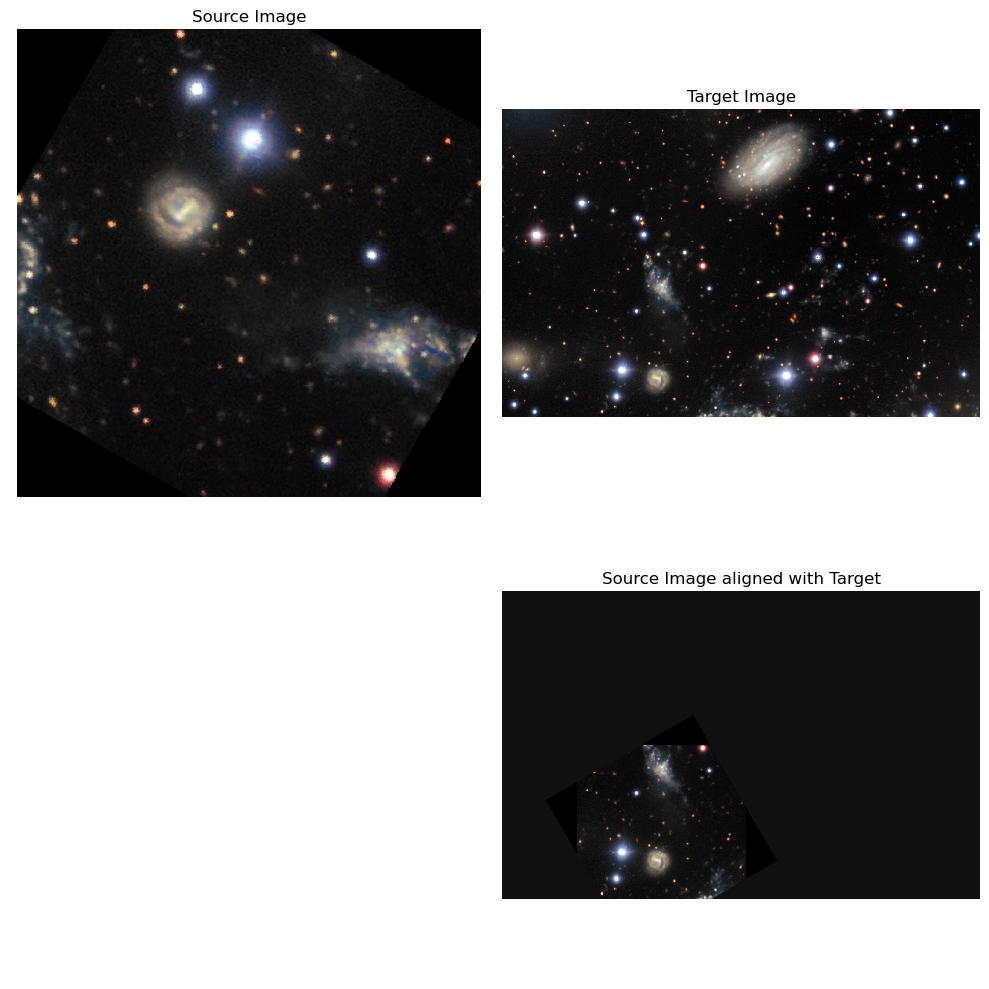

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(source, interpolation='none', origin='lower')
axes[0, 0].axis('off')
axes[0, 0].set_title("Source Image")

axes[0, 1].imshow(target, interpolation='none', origin='lower')
axes[0, 1].axis('off')
axes[0, 1].set_title("Target Image")

axes[1, 1].imshow(registered, interpolation='none', origin='lower')
axes[1, 1].axis('off')
axes[1, 1].set_title("Source Image aligned with Target")

axes[1, 0].axis('off')

plt.tight_layout()
plt.show()

### When you run out of matching triangles..

`MaxIterError: List of matching triangles exhausted before an acceptable transformation was found`


This can be a frequent error when dealing with large images or images that contain many stars.

Try: 

* Set *max_control_points* to a higher number (but it gets very slow for > 200) 
* Try limiting the region within which you match the image, if you have prior information
* Extract the point sources with an external program and then limit the matching to the brightest stars in the list